# Lyft System Data exploration 
## Ahmed ElSabbagh

## Preliminary Wrangling

The data we are following today is the Lyft system data, which Lyft had offered recently to the public as of January 2020, the data has been divided into all of 2017 data, and then divided per month (january, february etc) for each year from 2017 to current 2020, most recently updated was April Data.

Lyft is bike rental company, allowing the user to rent a bike from some station, use them for transportation, and drop them in another rental station, and depending on how long it took, the money automatically paid from the credit card.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
df2019 = pd.read_csv("201904-fordgobike-tripdata.csv")
df2020 = pd.read_csv("202004-baywheels-tripdata.csv")
df2018 = pd.read_csv("201804-fordgobike-tripdata.csv")

In [3]:
df2018.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,72393,2018-04-30 22:49:32.6180,2018-05-01 18:56:06.3010,4,Cyril Magnin St at Ellis St,37.785881,-122.408915,4,Cyril Magnin St at Ellis St,37.785881,-122.408915,3940,Customer,No
1,81034,2018-04-30 17:46:04.9970,2018-05-01 16:16:39.2470,122,19th St at Mission St,37.760299,-122.418892,42,San Francisco City Hall (Polk St at Grove St),37.778650,-122.418230,3374,Customer,No
2,86142,2018-04-30 16:07:13.9190,2018-05-01 16:02:56.7170,41,Golden Gate Ave at Polk St,37.781270,-122.418740,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,3191,Subscriber,Yes


In [4]:
df2019.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,50305,2019-04-30 22:33:55.1550,2019-05-01 12:32:20.4540,368.0,Myrtle St at Polk St,37.785434,-122.419622,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,2749,Subscriber,No
1,53725,2019-04-30 20:43:41.6320,2019-05-01 11:39:06.9170,246.0,Berkeley Civic Center,37.869060,-122.270556,241.0,Ashby BART Station,37.852477,-122.270213,2608,Customer,No
2,78072,2019-04-30 10:32:46.4890,2019-05-01 08:13:58.9750,64.0,5th St at Brannan St,37.776754,-122.399018,64.0,5th St at Brannan St,37.776754,-122.399018,258,Subscriber,No


In [5]:
df2020.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,5A1FF31692371859,electric_bike,2020-04-04 08:28:20,2020-04-04 08:33:34,NaN,NaN,NaN,NaN,37.7692,-122.4209,37.7703,-122.4069,casual
1,D8D5BA2D4F051133,electric_bike,2020-04-03 18:55:43,2020-04-03 19:21:05,NaN,NaN,NaN,NaN,37.8023,-122.4244,37.8023,-122.4244,casual
2,A3633A9140CA4FF8,electric_bike,2020-04-04 15:11:04,2020-04-04 15:12:21,NaN,NaN,NaN,NaN,37.7667,-122.3961,37.7667,-122.3962,casual


In [6]:
df2020.rideable_type.unique()

array(['electric_bike', 'docked_bike'], dtype=object)

In [7]:
df2018.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,131169.000000,131169.000000,131169.000000,131169.000000,131169.000000,131169.000000,131169.000000,131169.000000
mean,885.927369,115.930197,37.762504,-122.345369,113.923663,37.762677,-122.344650,2112.806044
std,2697.759807,95.822508,0.112139,0.130194,95.496324,0.112045,0.129584,1165.606593
min,61.000000,3.000000,37.312854,-122.444293,3.000000,37.312854,-122.444293,11.000000
25%,348.000000,34.000000,37.771058,-122.411726,30.000000,37.771058,-122.409851,1126.000000
50%,550.000000,86.000000,37.781123,-122.397086,81.000000,37.781270,-122.395936,2183.000000
75%,862.000000,182.000000,37.796248,-122.278267,182.000000,37.796248,-122.281051,3118.000000
max,86142.000000,345.000000,37.880222,-121.874119,345.000000,37.880222,-121.874119,4073.000000


In [8]:
df2019.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,239111.000000,239047.000000,239111.000000,239111.000000,239047.000000,239111.000000,239111.000000,239111.000000
mean,802.671199,141.836538,37.769536,-122.352503,140.838099,37.766996,-122.343420,3666.956493
std,1990.006091,116.289776,0.127698,0.277088,116.386168,0.343083,1.068144,2180.717333
min,61.000000,3.000000,0.000000,-122.453704,3.000000,0.000000,-122.453704,11.000000
25%,349.000000,47.000000,37.770083,-122.413004,44.000000,37.770407,-122.411738,1720.000000
50%,558.000000,104.000000,37.780760,-122.398285,102.000000,37.780955,-122.397437,3471.000000
75%,876.000000,240.000000,37.797280,-122.291209,239.000000,37.797320,-122.291376,5749.000000
max,86114.000000,420.000000,37.880222,0.000000,420.000000,37.880222,0.000000,7108.000000


In [9]:
df2020.describe()

,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng
count,53434.000000,51858.000000,84259.000000,84259.000000,84117.000000,84117.000000
mean,226.467755,221.176116,37.707087,-122.318657,37.706943,-122.318775
std,167.112430,166.366682,0.168721,0.199837,0.168726,0.199946
min,3.000000,3.000000,37.266500,-122.513200,37.221500,-122.513900
25%,75.000000,74.000000,37.756600,-122.427200,37.756700,-122.426900
50%,183.000000,169.000000,37.773500,-122.408400,37.773500,-122.408400
75%,381.000000,377.000000,37.787400,-122.285600,37.787400,-122.287600
max,521.000000,521.000000,37.880200,-121.806400,37.880200,-121.774300


In [10]:
df2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131169 entries, 0 to 131168
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             131169 non-null  int64  
 1   start_time               131169 non-null  object 
 2   end_time                 131169 non-null  object 
 3   start_station_id         131169 non-null  int64  
 4   start_station_name       131169 non-null  object 
 5   start_station_latitude   131169 non-null  float64
 6   start_station_longitude  131169 non-null  float64
 7   end_station_id           131169 non-null  int64  
 8   end_station_name         131169 non-null  object 
 9   end_station_latitude     131169 non-null  float64
 10  end_station_longitude    131169 non-null  float64
 11  bike_id                  131169 non-null  int64  
 12  user_type                131169 non-null  object 
 13  bike_share_for_all_trip  131169 non-null  object 
dtypes: f

In [11]:
df2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239111 entries, 0 to 239110
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             239111 non-null  int64  
 1   start_time               239111 non-null  object 
 2   end_time                 239111 non-null  object 
 3   start_station_id         239047 non-null  float64
 4   start_station_name       239047 non-null  object 
 5   start_station_latitude   239111 non-null  float64
 6   start_station_longitude  239111 non-null  float64
 7   end_station_id           239047 non-null  float64
 8   end_station_name         239047 non-null  object 
 9   end_station_latitude     239111 non-null  float64
 10  end_station_longitude    239111 non-null  float64
 11  bike_id                  239111 non-null  int64  
 12  user_type                239111 non-null  object 
 13  bike_share_for_all_trip  239111 non-null  object 
dtypes: f

In [12]:
df2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84259 entries, 0 to 84258
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ride_id             84259 non-null  object 
 1   rideable_type       84259 non-null  object 
 2   started_at          84259 non-null  object 
 3   ended_at            84259 non-null  object 
 4   start_station_name  53434 non-null  object 
 5   start_station_id    53434 non-null  float64
 6   end_station_name    51858 non-null  object 
 7   end_station_id      51858 non-null  float64
 8   start_lat           84259 non-null  float64
 9   start_lng           84259 non-null  float64
 10  end_lat             84117 non-null  float64
 11  end_lng             84117 non-null  float64
 12  member_casual       84259 non-null  object 
dtypes: float64(6), object(7)
memory usage: 8.4+ MB


In [13]:
#datetime.strptime(df2020.started_at[0],form).weekday()

In [14]:
k = 0 
form = "%Y-%m-%d %H:%M:%S"
df2020Modified = df2020.copy()
df2020Modified['duration_sec']=df2020.started_at
for i,j in zip(df2020.started_at,df2020.ended_at):
    df2020Modified['duration_sec'][k] = int((datetime.strptime(j, form) -datetime.strptime(i,form)).seconds)
    k+=1

F:\Installs\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
def getIfWeekDay(df,form,field):
    k = 0 
    df['week_day'] = df[field]
    for i in df[field]:
        day =  int(datetime.strptime(i, form).weekday())
        if day == 5 or day == 6:
            df['week_day'][k] = 'week_end'
        else:
            df['week_day'][k] = 'week_day'
        k+=1

In [16]:
#getIfWeekDay(df2019Modified,"%Y-%m-%d %H:%M:%S.%f","start_time")

In [17]:
#df2019Modified

In [18]:
df2020Modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84259 entries, 0 to 84258
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ride_id             84259 non-null  object 
 1   rideable_type       84259 non-null  object 
 2   started_at          84259 non-null  object 
 3   ended_at            84259 non-null  object 
 4   start_station_name  53434 non-null  object 
 5   start_station_id    53434 non-null  float64
 6   end_station_name    51858 non-null  object 
 7   end_station_id      51858 non-null  float64
 8   start_lat           84259 non-null  float64
 9   start_lng           84259 non-null  float64
 10  end_lat             84117 non-null  float64
 11  end_lng             84117 non-null  float64
 12  member_casual       84259 non-null  object 
 13  duration_sec        84259 non-null  object 
dtypes: float64(6), object(8)
memory usage: 9.0+ MB


In [19]:
df2020['member_casual'].unique()

array(['casual', 'member'], dtype=object)

In [20]:
df2019['user_type'].unique()

array(['Subscriber', 'Customer'], dtype=object)

In [21]:
df2020Modified["user_type"] = df2020Modified['member_casual']
df2020Modified["user_type"].replace({"casual": "Customer", "member": "Subscriber"}, inplace=True)

In [22]:
def cleanData(df,wantedTables):
    for i in df:
        if i not in wantedTables:
            del df[i]
    df.dropna()

In [23]:
df2019WantedData=['duration_sec','user_type',"week_day"]
df2020WantedData=['duration_sec','user_type',"week_day"]


In [24]:
df2018Modified = df2018.drop_duplicates()
df2019Modified = df2019.drop_duplicates()
df2020Modified2 = df2020Modified.drop_duplicates()

getIfWeekDay(df2020Modified2,"%Y-%m-%d %H:%M:%S","started_at")
getIfWeekDay(df2019Modified,"%Y-%m-%d %H:%M:%S.%f","start_time")
getIfWeekDay(df2018Modified,"%Y-%m-%d %H:%M:%S.%f","start_time")

cleanData(df2018Modified,df2019WantedData)
cleanData(df2019Modified,df2019WantedData)
cleanData(df2020Modified2,df2020WantedData)

df2020Modified2[["duration_sec"]] = df2020Modified2[["duration_sec"]].apply(pd.to_numeric)

df2020Modified2["year"]=2020
df2019Modified["year"]=2019
df2018Modified["year"]=2018


F:\Installs\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
F:\Installs\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [25]:
df2019Modified

,duration_sec,user_type,week_day,year
0,50305,Subscriber,week_day,2019
1,53725,Customer,week_day,2019
2,78072,Subscriber,week_day,2019
3,78969,Subscriber,week_day,2019
4,1128,Subscriber,week_day,2019
...,...,...,...,...
239106,184,Subscriber,week_day,2019
239107,539,Subscriber,week_day,2019
239108,292,Subscriber,week_day,2019
239109,471,Subscriber,week_day,2019


In [26]:
df2018Modified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131169 entries, 0 to 131168
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   duration_sec  131169 non-null  int64 
 1   user_type     131169 non-null  object
 2   week_day      131169 non-null  object
 3   year          131169 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 10.0+ MB


In [27]:
df2019Modified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239111 entries, 0 to 239110
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   duration_sec  239111 non-null  int64 
 1   user_type     239111 non-null  object
 2   week_day      239111 non-null  object
 3   year          239111 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 19.1+ MB


In [28]:
df2020Modified2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84259 entries, 0 to 84258
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   duration_sec  84259 non-null  int64 
 1   user_type     84259 non-null  object
 2   week_day      84259 non-null  object
 3   year          84259 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 5.7+ MB


In [29]:
df2019Modified.describe()

,duration_sec,year
count,239111.000000,239111.0
mean,802.671199,2019.0
std,1990.006091,0.0
min,61.000000,2019.0
25%,349.000000,2019.0
50%,558.000000,2019.0
75%,876.000000,2019.0
max,86114.000000,2019.0


In [30]:
df2020Modified2.describe()

,duration_sec,year
count,84259.000000,84259.0
mean,1351.826476,2020.0
std,3445.005514,0.0
min,0.000000,2020.0
25%,401.000000,2020.0
50%,753.000000,2020.0
75%,1481.000000,2020.0
max,86399.000000,2020.0


In [32]:
df_final = df2020Modified2.append(df2019Modified).append(df2018Modified)
df_final['duration_min'] = df_final['duration_sec']/60
df_final["year"] = df_final["year"].astype(str)
df_final.duration_min = df_final.duration_min.astype("float64")
df_final.duration_sec = df_final.duration_sec.astype("float64")
df_final.drop(df_final.query("duration_min> 90").index,inplace=True)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 441150 entries, 10 to 131168
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   duration_sec  441150 non-null  float64
 1   user_type     441150 non-null  object 
 2   week_day      441150 non-null  object 
 3   year          441150 non-null  object 
 4   duration_min  441150 non-null  float64
dtypes: float64(2), object(3)
memory usage: 20.2+ MB


In [33]:
df_final.describe() # 86399.000000 1439.983333

,duration_sec,duration_min
count,441150.000000,441150.000000
mean,761.717618,12.695294
std,673.071546,11.217859
min,0.000000,0.000000
25%,353.000000,5.883333
50%,573.000000,9.550000
75%,924.000000,15.400000
max,5400.000000,90.000000


### What is the structure of your dataset?

The dataset is structured into several seperate datasets for each month from 2018 to 2020, as well as full data from 2017, the dataset contains mostly geographical data, such as the longitude and latitude of the start and finish stations, it also contains IDs for the stations, the user's and a unique ride ID, as well as the names of the station and the start and finishing time, the structure in 2020 changes, giving different names for the columns, and remove the pre-calculated duration of the trip in favor of calculating it on the spot. There are also 2 mismatching columns type of the ride, and bike was shared.

### What is/are the main feature(s) of interest in your dataset?

The main features of interest is the duration of the trip, as it is the only consistant quantative feature that can be exploited in answering the question of this exploration, which is: how much did covid-19 affect the bike rents in a specified amount of time. In order to investigate this question, the data from April 2018-2019-2020 are to be used, where 2018 and 2019 are being used as reference against 2020. It is assumed that the duration and frequency of the rides are to be affected by covid-19, and therefore they should be heavily decreased.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Since the duration data in 2020 is missing, it has to be calculated date-time comparison of start and finishing time, which I did and produced duration_sec feature in 2020 dataset, most features other features are useless for the scope of this investegation, except user_type, where it a type of user whether a subscriber/member or a Customer/casual user can be more likely to use, as a subscriber would idealy not want to give up their subscription fee usage, or the number of subscribers might decrease because they want to free themselves up from a burden that they are not using, and therefore would become more casual users and rarely use the bikes.

A new column for the year is added (2018,2019,2020) after all the data from the datasets were combined, and the whether it is a week day or a weekend is also added.

April was used as it is the most recently updated part of the data, and since covid-19 is at its worst at that time, it will be the perfect point of comparison .

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [34]:
base_color = sb.color_palette()[0]
duration_per_year = df_final.groupby("year").duration_min.sum()
years = duration_per_year.index

In [35]:
duration_per_year

year
2018    1.459882e+06
2019    2.715872e+06
2020    1.424775e+06
Name: duration_min, dtype: float64

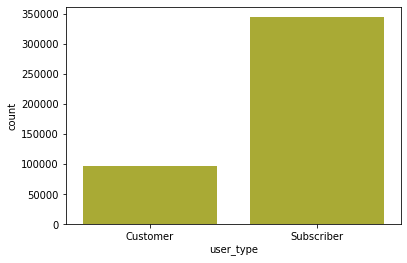

In [36]:
base_color = sb.color_palette()[8]
sb.countplot(data = df_final, x = 'user_type',color=base_color)

This chart shows that more users tend to be subscribers as opposed to casual customers, would need to be more specific to the year later.

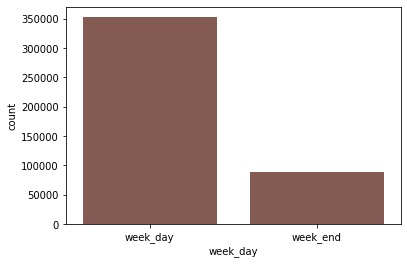

In [37]:
base_color = sb.color_palette()[5]
sb.countplot(data = df_final, x = 'week_day',color=base_color)

This chart shows the amount of week ends compared to regular week days, as expected, people tend to go to work and therefore use Lyft more often on regular week days compared to weekends, would need to be more specific to the year later.

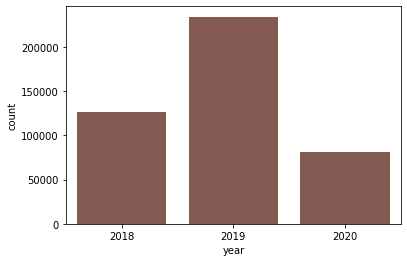

In [38]:
sb.countplot(data = df_final, x = 'year',color=base_color)

The first thing we notice is that April 2020 has much less the amount of ride in 2020, 2018 had a low frequency as well, but this could be interpreted as having less users as Lyft was still not widespread enough, we could also look at the total duration for how much total rides each year had.

([<matplotlib.axis.XTick at 0x14e7500ad88>,
 <a list of 3 Text xticklabel objects>)

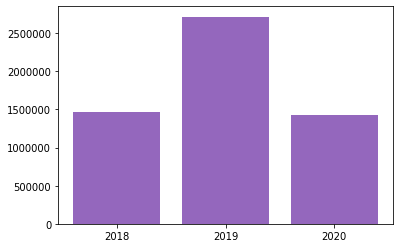

In [39]:
base_color = sb.color_palette()[4]
plt.bar(years, duration_per_year, align='center',color=base_color)
plt.xticks(list(years))

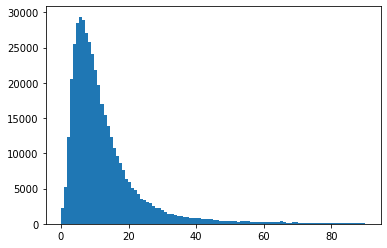

In [40]:
plt.hist(data=df_final,x="duration_min",bins=100);

In this histogram, we can find that most rides are only 20 to 40 minutes limit, while there are others that can be considered outliers to the standard, it is however skewed to the right, therefore we could log scale for better representation

In [41]:
np.log10(df_final.duration_min.max())

1.954242509439325

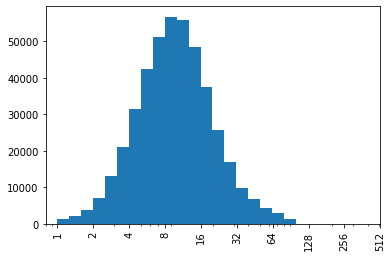

In [42]:
bin_edges = 10 ** np.arange(0.0, np.log10(df_final.duration_min.max())+0.1,0.1)
plt.hist(df_final.duration_min, bins = bin_edges);
plt.xscale('log')
tick_locs = [1,2,4,8,16,32,64,128,256,512];
plt.xticks(tick_locs, tick_locs, rotation='vertical');

In this histogram, the attempt was to find out how the average trip duration, which seems to follow a uniform distribution when put into the log scale, this chart however is useless when put together in the context of the research, faceting in multivariate investigation for each year will be more useful.

Similar to the previous chart, April 2020 has also seen a sharp decrease in the total duration of the rides, however this is obviously because there are less rides as seen in the previous charts, less rides means less time to time, but how did the average rides get affected? Is the median more or less, we will find out in the bivariate exploration.

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The distributions were almost as expected, when looking at the duration per minute instead of per second, the distribution gets even more uniform compared to seconds, which will be helpful later when presenting the data in explanatory analysis. There was however a need to transform the data to logarithmic scale on the histogram because most data is skewed to the right on a regular scale, while log scale is more representative. 

The bar charts showed the expected trends, where Lyft was less widely known and used in 2018 compared to 2019, and COVID-19 returned the usage time-wise and frequency-wise to 2018.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

No, there were no unusual distributions, the distribution came normal as expected, and the amount of usage is also as frequent as expected, with Lyft getting more rides on 2019 and less in 2018 and 2020, both for different reasons, but ultimetly showing that the usage was decreased due to covid-19.

There was a lot of cleaning to be made, 

1st: Duration per minute did not exist and had to be calculated.

2nd: Any duration was absent in 2020 dataset and it had to be calculated by comparing start time to end time.

3rd: Week day had to be calculated.

4th: User type had different names and different values between 2018-2019 and 2020, so it had to be adjusted.

5th: When all the data on each individual datasets were transformed accordingly, duplicated were removed, unused columns were removed, and null rows were dropped. Afterwards, every the datasets were appeneded together to create a total of 454539 rides, all marked by year.

6th: Finally, after going through bivariate comparison, mainly box plot and violin plot, I have decided that there too many outliers in the duration, therefore, I have decided to remove all durations that last more than 90 minutes, the assumption here is that people have simply forgotten to stop their ride, which would explain a 24 hour ride, after testing the removal of several parts of the dataset, I have found that a 90 minute ride max is reasonable and does not affect the overall results much. The final total rides being 441150.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

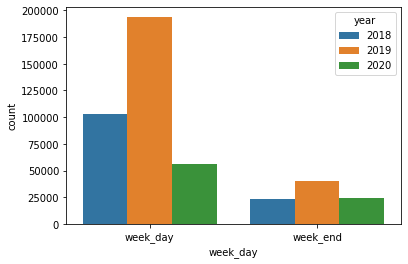

In [43]:
sb.countplot(data = df_final, x = 'week_day', hue = 'year')

From this chart, we can see the effect of covid-19 on the working days, while the weekend variable show very low usage, which is to be expected because people, as discussed before, would only use the lyft bike and scooters to go to work, and they will not use them for weekends. 

On that notice, weekends indicate nothing. However there is a sharp decrease to almost only a third what it used to be on 2019 and below half of that of 2018, indicating that Lyft's main peek time for revenue is in danger. 

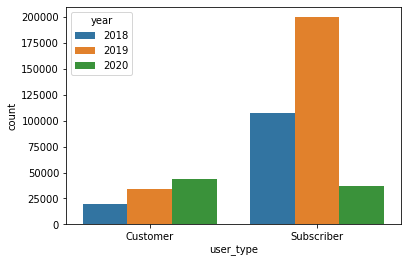

In [44]:
sb.countplot(data = df_final, x = 'user_type', hue = 'year')

In [163]:
sums

[388583.34999999957,
 1071298.66666667,
 609427.1333333331,
 2106445.0000000237,
 867787.2833333275,
 556987.3499999973]

Similarly, the number of subscriber rides have decreased to almost less than a fifth. If the dataset for the subscribers were provided, we might find the number of subscribers decreased in general. However since there is no indication for that we cannot confirm it.

This is in contrast with the casual customer, where the number of casual rides have actually increased as opposed to  2019. This could be explained in that former subscribers still need to occasionally go to work or groceries or do some activities, so they will use Lyft. Considering that the cost for scooter subscriber is only 0.05$ less than the casual customer, paying the monthly fee is no longer as beneficial or cost saving as just riding casual.

(-8.265209699187794, 98.2652096991878)

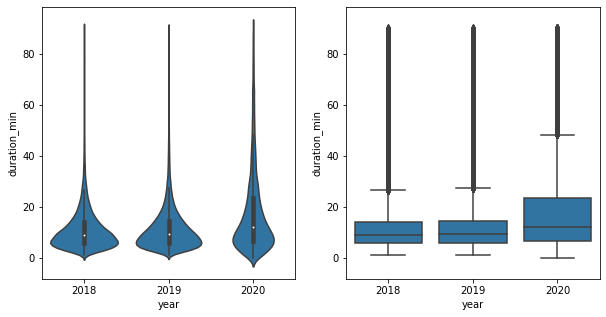

In [59]:
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[0]
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = df_final, y= 'duration_min', x = 'year', color = base_color)

plt.subplot(1, 2, 2)
ax2 = sb.boxplot(data = df_final, y = 'duration_min', x = 'year', color = base_color)
plt.ylim(ax1.get_ylim())

This boxplot and violinplot duo indicate an unusual trend in 2020, the median time for the rides have increased, this is likely due to the rides in the case before covid-19 being shorter, as people live closer to where they work and thus since less people go to work the decreasing number of rides have affected the median and quartile's size. And it so happens that people still going to work travel the furtherst.

<Figure size 1440x720 with 0 Axes>

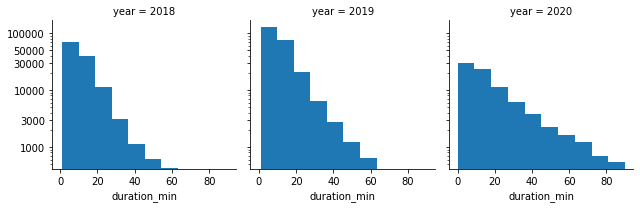

In [175]:
plt.figure(figsize = [20, 10])
g = sb.FacetGrid(data = df_final, col = 'year')
g.map(plt.hist, "duration_min").set(yscale = 'log')

ticks = [1000,3000, 10000,30000,50000, 100000]
labels = [i for i in ticks]

g.set(yticks = ticks, yticklabels = labels)

This faceted histogram have confirmed the trend, the number of rides longer than 60 minutes have been very litle in 2018-2019 compared to 2020. However there was overall more trips, therefore the increased ride duration have do not compensate for the loss of revenue enough

<Figure size 1440x720 with 0 Axes>

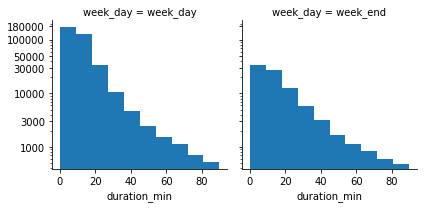

In [124]:
plt.figure(figsize = [20, 10])
g = sb.FacetGrid(data = df_final, col = 'week_day')
g.map(plt.hist, "duration_min").set(yscale = 'log')

ticks = [1000,3000, 10000,30000,50000, 100000, 180000]
labels = [i for i in ticks]

g.set(yticks = ticks, yticklabels = labels)

This faceted histogram does also show how week days take the most duration, doubling over the weekends, however it does not show how it was affected by year, this will need multivariate exploration.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The following trend was improved and became clearer in the bivariate exploration.
 
People spent less time on bikes, which as shown boxplot and violinplot, as well as the histogram, it is true, however this is because less people in general ride bikes anywhere, however people who do ride the bikes take more time than they used to, so while the overall number of people riding bikes have decreased an therefore the total amount of time spent is decrease, individually more people began to ride bikes in extended periods.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Two more trends became clearer:

1) People were originaly assumed to be more likely to subscribe to lyft because it is less expensive, but now we see that because of covid-19, the trend shifted to being more casual because people don't get out enough and use lyft in a way that justifies the cost.
 
2) Week days were assumed to always have more rides, which they still do, however since less people go to work on week days, it has become weekends are very much on par with weekdays, meaning that work days have been indeed severely damaged

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

Text(0.5, 0, '')

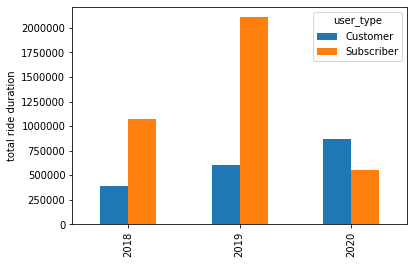

In [183]:
x = df_final.groupby(["year","user_type"])
data = []
for i,j in zip(x.duration_min.sum(),x.duration_min.sum().index):
    temp = []
    temp.append(j[0])
    temp.append(j[1])
    temp.append(i)
    data.append(temp)
df = pd.DataFrame(data,columns=['year','user_type','duration'])

df.pivot("year", "user_type", "duration").plot(kind='bar')
plt.ylabel("total ride duration")
plt.xlabel("")

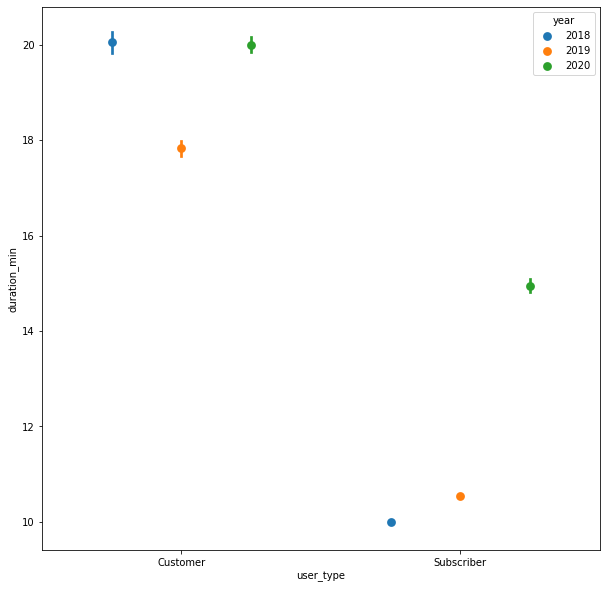

In [191]:

plt.figure(figsize=(10,10))
ax = sb.pointplot(data = df_final, x = 'user_type', y = 'duration_min', hue = 'year',
                  dodge = 0.5, linestyles = "")

This bar chart takes shows the amount of time spent by each type of user over the three Aprils, this is made to further confirm the perviously confirmed trends, firstly: Less subscribers are taking rides, Secondly: more customers are taking rides, Thirdly: the amount of time in either of those does not compensate the loss Lyft had compared to previous years.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!